In [34]:
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

Text(0.5, 0.92, 'Площина обмежень')

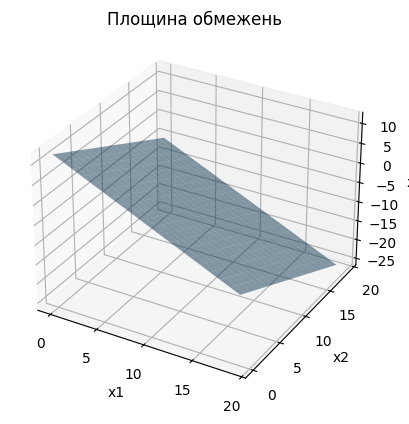

In [36]:
B = 120  # золотих
c = np.array([14, 9, 6])  # прибуток
A = np.array([[11, 9, 10]])  # вартість кожного товару
b = np.array([B])
bnd = [(0, None), (0, None), (0, None)]

# Побудова площини обмежень
x1 = np.arange(0, 20)
x2 = np.arange(0, 20)
x1, x2 = np.meshgrid(x1, x2)
x3 = (B - 11*x1 - 9*x2) / 10

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, x3, alpha=0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title("Площина обмежень")

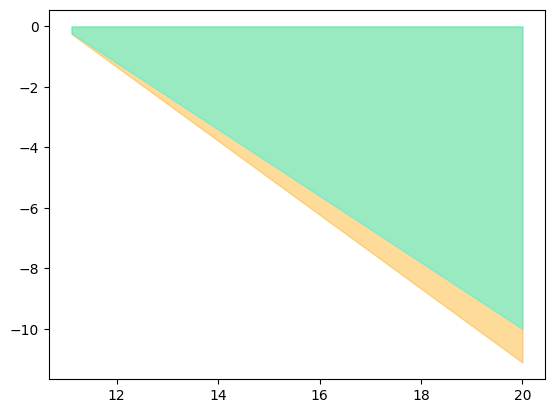

In [37]:
x1 = np.linspace(0, 20, 100)
x21 = (B - 11*x1) / 9   # x3 = 0
x31 = (B - 11*x1) / 10  # x2 = 0

plt.fill_between(x1, x21, 0, where=x21<0, alpha=0.4, color='orange', label='x3 = 0')
plt.fill_between(x1, x31, 0, where=x31<0, alpha=0.4, color='cyan', label='x2 = 0')

In [38]:
# обертаємо задачу на знаходження мінімуму
c = np.array([10, 7, 5])

# Записуємо матрицю умов (з коефіцієнтів рівнянь)
A = np.array([
    [8, 7, 12]
])

# Записуємо матрицю розвязків
b = np.array([B])

# Записуємо вектор обмежень області значень
bnd = [(0, None), (0, None), (0, None)]

res = linprog(-c, A_ub=A, b_ub=b, bounds=bnd)
x1, x2, x3 = res.x
profit = -res.fun

# Вивід результатів
print(f"Кількість предмету 1: {x1}")
print(f"Кількість предмету 2: {x2}")
print(f"Кількість предмету 3: {x3}")
print(f"Загальний прибуток: {profit} золотих")

Кількість предмету 1: 15.0
Кількість предмету 2: 0.0
Кількість предмету 3: 0.0
Загальний прибуток: 150.0 золотих
